# Titanic survived Project--------------------------------------------------

# <span style="color:green">Project Description

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912.                
It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points,                     
and whether or not they survived the disaster.                           
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


# <span style="color:green"> Attribute Information
Passenger id- Unique Id of the passenger                
Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)                   
Survived- Survived (0 = No; 1 = Yes)                      
Name- Name of the passenger                  
Sex- Sex of the passenger (Male, Female)                     
Age- Age of the passenger                        
Sibsp- Number of Siblings/Spouses Aboard                
Parch- Number of Parents/Children Aboard               
Ticket- Ticket Number                 
Fare- Passenger Fare (British pound)                 
Cabin- Cabin                         
Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


# Dataset Link-
https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv


<span style="color:purple">****We have to predict if an arbitrary passenger on Titanic would survive the sinking or not. It is clearly a classification problem which contain 0 (i.e. not survived ) and 1 (i.e. survived). 
where "Survived" is target column and remaining columns are features.****

# Python Implementation-

# <span style="color:purple">****Importing Necessary Libraries****

In [228]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [229]:
#Importing Dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [230]:
print(f'The rows and columns in the dataset:{df.shape}')
print(f'\n The columns in the dataset:{df.columns}')

The rows and columns in the dataset:(891, 12)

 The columns in the dataset:Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [231]:
#setting index with PassengerId
df.set_index('PassengerId',inplace =True)

In [232]:
# getting all information of dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


<span style="color:BLUE">Observation -There are three data types of present in  dataset:(float64,int64,object)

In [233]:
#checking number of unique values in each column 
df.nunique().to_frame("No of unique values")

,No of unique values
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248
Cabin,147


In [234]:
#Checking the valuecount(i.e frequency of each value ) of each column 
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


0    678
1    118
2     80
5      

<span style="color:BLUE">Observation - In dataset there is no blank space.

In [235]:
#checking the null values in each column
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<span style="color:BLUE">Observation -1)-There are 177 NaN values present in "Age",687 NaN values in "Cabin" and 2 NaN values present in "Embarked" column.                 
 2)"Cabin" column does not contribute in any useful information and contain 687 NaN values in it.Hence drop this column.

In [236]:
#Dropping "Cabin" Column 
df=df.drop(["Cabin"],axis=1)
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [237]:
#Replacing the NaN with the mode value in Age and Embarked column
df["Age"].fillna(df["Age"].mode()[0],inplace = True)
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace = True)

#checking the null values in each column again
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [238]:
#Checking Duplicate values in DataFrame
print("Total Dublicate rows are:",df.duplicated().sum())

Total Dublicate rows are: 0


In [239]:
#Seperating Numerical and Categorical column

#checking for Categorical column
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("categorical_column",categorical_col)
print("\n")

#checking for Numerical column
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical_column",numerical_col)


categorical_column ['Name', 'Sex', 'Ticket', 'Embarked']


Numerical_column ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


<span style="color:purple">****Description of  Dataset****

In [240]:
#Statistical summary of numerical column
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<span style="color:blue">10) From the above description , we can observe the following things:                 
    .)No missing values are present in dataset                
    .) The mean value is greater than median(50%) in "Age","SibSp","Parch" & "Fare",which means data is skewed right in these.      
    .)The mean value is smaller than median(50%) in "Pclass",which means data is skewed left in these               
    .)There is  difference in 75% and max value,it means Outliers are present in the dataset.

<span style="color:red">****Data Visualisation****

0    549
1    342
Name: Survived, dtype: int64


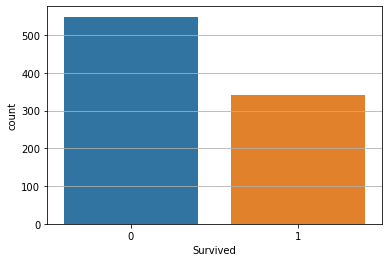

In [241]:
 #Visualise the number of Survived
ax=sns.countplot(x="Survived",data =df)
print(df["Survived"].value_counts())
plt.grid(axis ='y')

<span style="color:BLUE">Observation - Here number of "survived" people is less as compared to "not survived". 

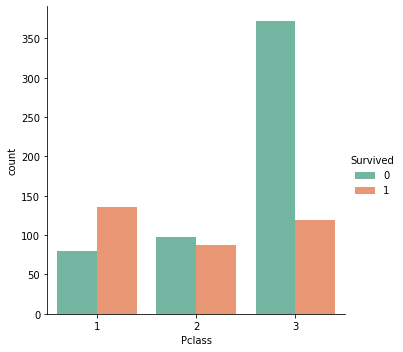

In [242]:
#checking "Pclass" and  "Survived"
sns.catplot(x="Pclass",hue="Survived", data= df, kind= "count", palette= "Set2")

<span style="color:BLUE">Observation - Having more number of passenger in 3rd Pclass but most survived passenger are from 1st Pclass.

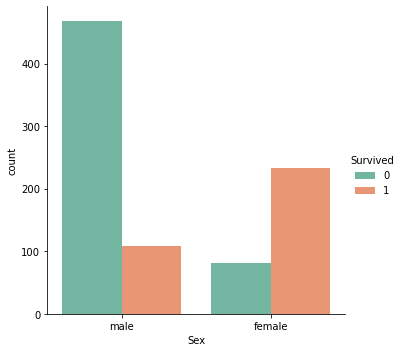

In [244]:
#checking Sex and Survived
sns.catplot(x="Sex",hue="Survived", data= df, kind= "count", palette= "Set2")

<span style="color:BLUE">Observation -No. of male in ship is more than female but more number of female are survived.

<AxesSubplot:xlabel='Age', ylabel='Count'>

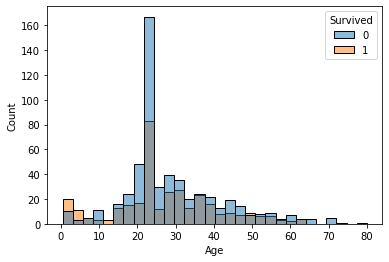

In [246]:
#checking Age and Survived
sns.histplot(x="Age",hue="Survived", data= df,)

<span style="color:BLUE">Observation - More number of passenger are from (20-30) age group as it clearly seen from from graph.

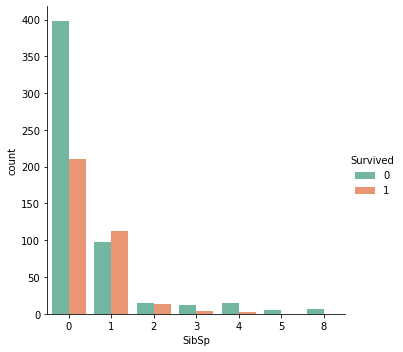

In [324]:
#checking SibSp and Survived
sns.catplot(x="SibSp",hue="Survived", data= df, kind= "count", palette= "Set2")

<span style="color:BLUE">Observation- Most of the passenger comes alone in ship and survived more.

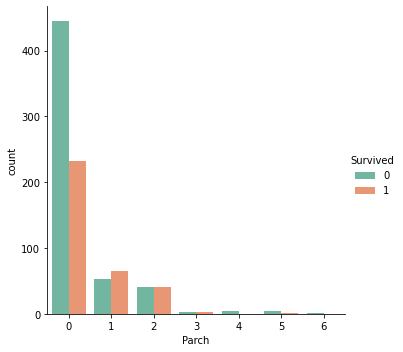

In [249]:
#checking Parch and Survived
sns.catplot(x="Parch",hue="Survived", data= df, kind= "count", palette= "Set2")

<span style="color:BLUE">Observation- Most of the passenger does not have Parents/Children Aboard and survived more.

Text(0.5, 1.0, 'Fare')

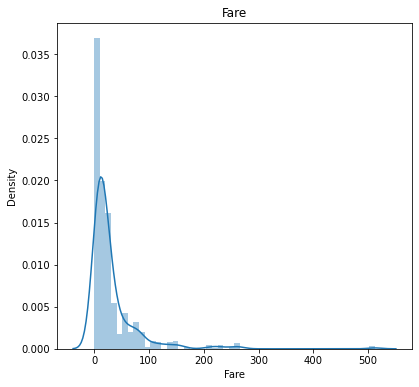

In [250]:
#Checking Fare
plt.figure(figsize=(14,6), facecolor='white')
ax = plt.subplot(1,2,1)
sns.distplot(df['Fare'])
plt.title("Fare")

<span style="color:BLUE">Observation -From the graph, fare is positively or rightly skewed 

S    646
C    168
Q     77
Name: Embarked, dtype: int64


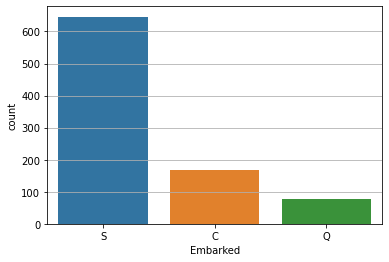

In [254]:
#Visualise the number of Survived
ax=sns.countplot(x="Embarked",data =df)
print(df["Embarked"].value_counts())
plt.grid(axis ='y')

<span style="color:BLUE">Observation - Most of people boarded from Southampton as compared to others port.

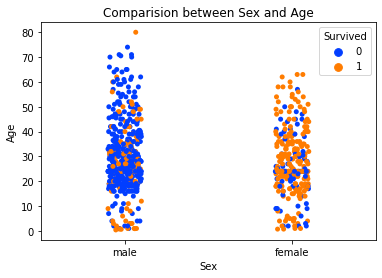

In [256]:
#comparing sex and age on the basis of Survived
plt.title("Comparision between Sex and Age")
sns.stripplot(x= "Sex", y="Age", data= df, hue = "Survived", palette= "bright") 
plt.show()

<span style="color:BLUE">Observation - No any particular age group of female were survived.

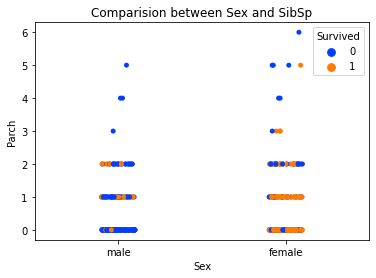

In [257]:
#comparing sex and SibSp on the basis of Survived
plt.title("Comparision between Sex and SibSp")
sns.stripplot(x= "Sex", y="Parch", data= df, hue = "Survived", palette= "bright") 
plt.show()

<span style="color:BLUE">Observation -There is no relation between Sex and SibSp. 

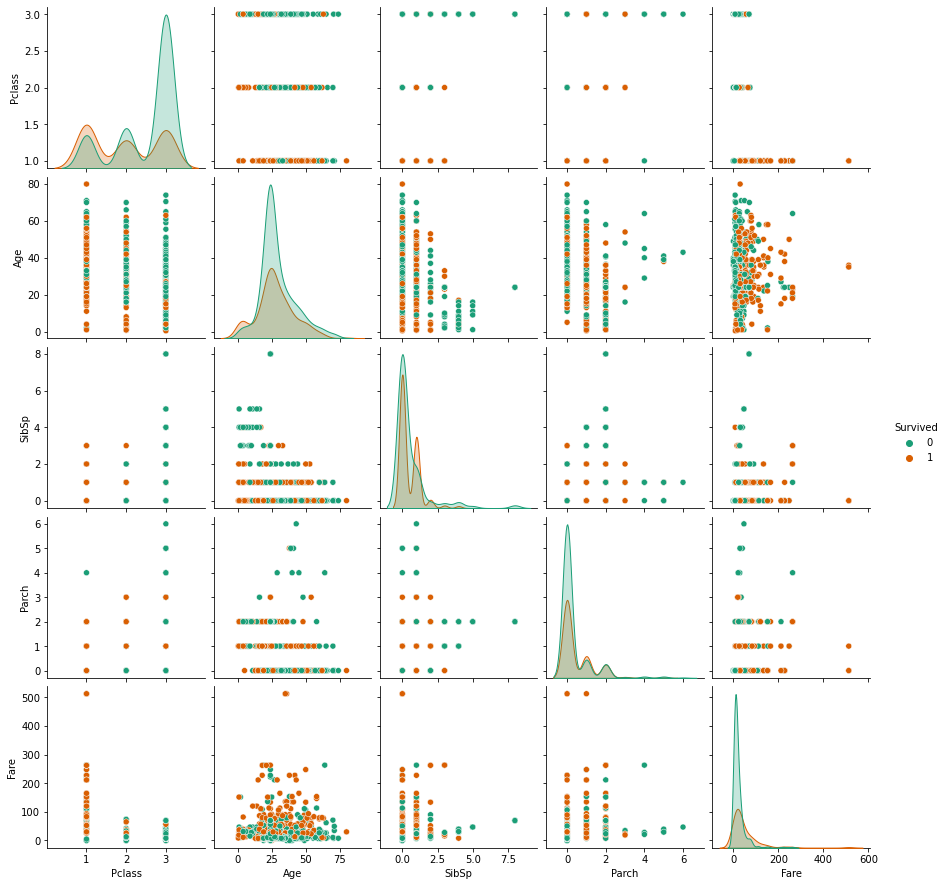

In [259]:
#Multivirate analysis
sns.pairplot( df, hue= "Survived",palette= "Dark2")
plt.show()

<span style="color:red">****Checking Skwewness****

In [261]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.657753
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

<span style="color:BLUE">Observation - We have skewness in SibSp ,Parch,Fare but SibSp ,Parch are categorical data.Hence does not check Skewness on these two column
but Fare is continious data ,lets reduce skewness in Fare column.

In [262]:
#Removing Skewness using cuberoot method
df["Fare"]=np.cbrt(df["Fare"])
df.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.657753
SibSp       3.695352
Parch       2.749117
Fare        1.230382
dtype: float64

In [263]:
#Removing Skewness using squareroot method
df["Fare"]=np.sqrt(df["Fare"])
df.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.657753
SibSp       3.695352
Parch       2.749117
Fare       -0.957025
dtype: float64

<span style="color:BLUE">Observation -Now skewness is reduced on Fare column.

<span style="color:red">****Checking for Outliers****

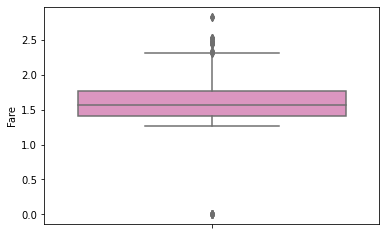

In [264]:
#Lets check  the Outliers by plotting boxplot
sns.boxplot( y = df['Fare'] , palette = 'Set2_r')
plt.show()

<span style="color:BLUE">Observation -There is Outliers present in Fare column but no need to remove outlier because of small dataset

In [265]:
#checking Correlation 
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.052872,-0.035322,0.081629,0.304681
Pclass,-0.338481,1.000000,-0.356187,0.083081,0.018443,-0.547210
Age,-0.052872,-0.356187,1.000000,-0.232411,-0.155118,0.109239
SibSp,-0.035322,0.083081,-0.232411,1.000000,0.414838,0.278006
Parch,0.081629,0.018443,-0.155118,0.414838,1.000000,0.293419
Fare,0.304681,-0.547210,0.109239,0.278006,0.293419,1.000000


<AxesSubplot:>

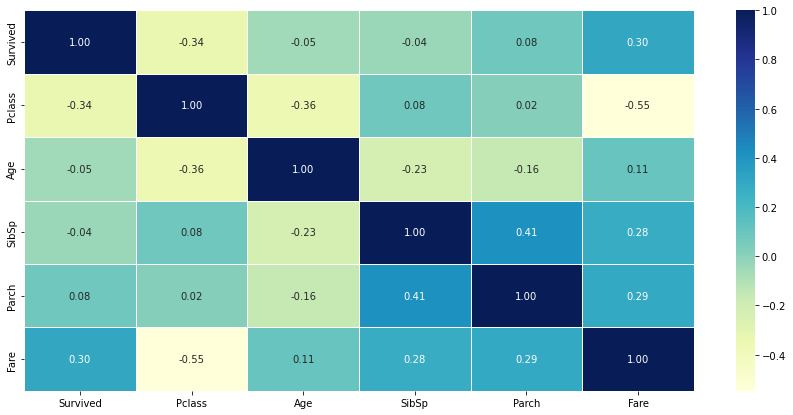

In [266]:
#checking the corelation  again using heatmaps (only absolute values)
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(), annot = True, linewidths=0.5, fmt='.2f',cmap = "YlGnBu")

In [267]:
#checking Correlation with "Close" Column
df.corr().Survived.sort_values()

Pclass     -0.338481
Age        -0.052872
SibSp      -0.035322
Parch       0.081629
Fare        0.304681
Survived    1.000000
Name: Survived, dtype: float64

<span style="color:BLUE">Observation -There is no case of Multicollinearity and SibSp has negative and weak relation with label column. Hence drop this column later.

In [268]:
#Encoding features
df['Sex'] = df['Sex'].replace({'female': 0, 'male': 1})

<span style="color:red">****Seperating Feature and Label**** 

In [269]:
#Seperating Feature and label into x and y
x=df.drop(["Survived",'Name','SibSp','Ticket','Embarked'],axis=1)#'Name','Ticket','Embarked' doesn't ontribute to predict.
y=df["Survived"]

print("Feature Dimension :" ,x.shape)
print("Target Dimension :" ,y.shape)

Feature Dimension : (891, 5)
Target Dimension : (891,)


<span style="color:red">****Feature Scaling Using Standard Scaler****

In [272]:
# data scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x_scaled

,Pclass,Sex,Age,Parch,Fare
0,0.827377,0.737695,-0.497793,-0.473674,-0.676240
1,-1.566107,-1.355574,0.715048,-0.473674,1.178964
2,0.827377,-1.355574,-0.194583,-0.473674,-0.616433
3,-1.566107,-1.355574,0.487640,-0.473674,0.898468
4,0.827377,0.737695,0.487640,-0.473674,-0.605827
...,...,...,...,...,...
886,-0.369365,0.737695,-0.118780,-0.473674,-0.267247
887,-1.566107,-1.355574,-0.725201,-0.473674,0.392314
888,0.827377,-1.355574,-0.346188,2.008933,0.188394
889,-1.566107,0.737695,-0.194583,-0.473674,0.392314


<span style="color:red">****Split the data into training and testing sets****

In [275]:
# Split the data into training and testing sets 
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split (x_scaled, y, test_size = .30, random_state = 48)
print("Total Size Of Feature in Dataset :",x_scaled.shape)
print("Total Size Of Training Feature Dataset : " ,x_train.shape)
print("Total Size Of Testing Feature Dataset : ", x_test.shape)

print("Total Size Of Label in Dataset :",y.shape)
print("Total Size Of Training Label Dataset : " ,y_train.shape)
print("Total Size Of Testing Label Dataset : ", y_test.shape)

Total Size Of Feature in Dataset : (891, 5)
Total Size Of Training Feature Dataset :  (623, 5)
Total Size Of Testing Feature Dataset :  (268, 5)
Total Size Of Label in Dataset : (891,)
Total Size Of Training Label Dataset :  (623,)
Total Size Of Testing Label Dataset :  (268,)


# Modelling

# Logistic Regression

In [294]:
from sklearn.linear_model import LogisticRegression
# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(x_train, y_train)
# Predict the target variable for the train data
y_pred_train=logreg.predict(x_train)
# Predict the target variable for the test data
y_pred = logreg.predict(x_test) 


# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
# Evaluate the model's performance
print("Accuracy on train data:", accuracy_score(y_train, y_pred_train))
print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on train data: 0.7913322632423756
Accuracy on test data: 0.7723880597014925
Confusion Matrix:
 [[132  35]
 [ 26  75]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.81       167
           1       0.68      0.74      0.71       101

    accuracy                           0.77       268
   macro avg       0.76      0.77      0.76       268
weighted avg       0.78      0.77      0.77       268



# XGBClassifier

In [295]:
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(x_train, y_train)

# Predict the target variable for the train data
y_pred_train=xgb.predict(x_train)
# Predict the target variable for the test data
y_pred = xgb.predict(x_test) 


# Evaluate the model's performance
print("Accuracy on train data:", accuracy_score(y_train, y_pred_train))
print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on train data: 0.9695024077046549
Accuracy on test data: 0.7873134328358209
Confusion Matrix:
 [[136  31]
 [ 26  75]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.83       167
           1       0.71      0.74      0.72       101

    accuracy                           0.79       268
   macro avg       0.77      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



# KNeighborsClassifier

In [296]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(x_train, y_train)

# Predict the target variable for the train data
y_pred_train=knn.predict(x_train)
# Predict the target variable for the test data
y_pred = knn.predict(x_test) 

# Evaluate the model's performance
print("Accuracy on train data:", accuracy_score(y_train, y_pred_train))
print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on train data: 0.8619582664526485
Accuracy on test data: 0.8134328358208955
Confusion Matrix:
 [[139  28]
 [ 22  79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.85       167
           1       0.74      0.78      0.76       101

    accuracy                           0.81       268
   macro avg       0.80      0.81      0.80       268
weighted avg       0.82      0.81      0.81       268



# DecisionTreeClassifier

In [297]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

# Predict the target variable for the train data
y_pred_train=dtc.predict(x_train)
# Predict the target variable for the test data
y_pred = dtc.predict(x_test) 


# Evaluate the model's performance
print("Accuracy on train data:", accuracy_score(y_train, y_pred_train))
print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on train data: 0.9823434991974318
Accuracy on test data: 0.746268656716418
Confusion Matrix:
 [[135  32]
 [ 36  65]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       167
           1       0.67      0.64      0.66       101

    accuracy                           0.75       268
   macro avg       0.73      0.73      0.73       268
weighted avg       0.74      0.75      0.75       268



# SVM

In [298]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

# Predict the target variable for the train data
y_pred_train=svc.predict(x_train)
# Predict the target variable for the test data
y_pred = svc.predict(x_test) 

# Evaluate the model's performance
print("Accuracy on train data:", accuracy_score(y_train, y_pred_train))
print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy on train data: 0.8282504012841091
Accuracy on test data: 0.8208955223880597
Confusion Matrix:
 [[148  19]
 [ 29  72]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       167
           1       0.79      0.71      0.75       101

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



# AdaBoostClassifier

In [299]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)

# Predict the target variable for the train data
y_pred_train=ada.predict(x_train)
# Predict the target variable for the test data
y_pred = ada.predict(x_test) 

# Evaluate the model's performance
print("Accuracy on train data:", accuracy_score(y_train, y_pred_train))
print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy on train data: 0.8394863563402889
Accuracy on test data: 0.8097014925373134
Confusion Matrix:
 [[140  27]
 [ 24  77]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       167
           1       0.74      0.76      0.75       101

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



# RandomForestClassifier

In [300]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)

# Predict the target variable for the train data
y_pred_train=RFC.predict(x_train)
# Predict the target variable for the test data
y_pred = RFC.predict(x_test) 

# Evaluate the model's performance
print("Accuracy on train data:", accuracy_score(y_train, y_pred_train))
print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy on train data: 0.9823434991974318
Accuracy on test data: 0.8097014925373134
Confusion Matrix:
 [[143  24]
 [ 27  74]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       167
           1       0.76      0.73      0.74       101

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



# <span style="color:green">Out of all above models SupportVectorClassifier perform well with accuracy 82%.

<span style="color:red">****Cross-Validation score- to check if the model is overfitting****

In [301]:
from sklearn.model_selection import cross_val_score

In [305]:
#LogisticRegression
#For smaller datasets, use k=5 or k=10. For larger datasets, use k=10 or k=20.
print("Cross-Validation score of each fold of Dataset:",cross_val_score(logreg,x_scaled,y,cv=5))
print("Overall Cross-Validation score :",cross_val_score(logreg,x_scaled,y,cv=5).mean())

Cross-Validation score of each fold of Dataset: [0.7877095  0.78089888 0.78651685 0.7752809  0.79213483]
Overall Cross-Validation score : 0.7845081915761722


In [304]:
#XGBClassifier
#For smaller datasets, use k=5 or k=10. For larger datasets, use k=10 or k=20.
print("Cross-Validation score of each fold of Dataset:",cross_val_score(xgb,x_scaled,y,cv=5))
print("Overall Cross-Validation score :",cross_val_score(xgb,x_scaled,y,cv=5).mean())

Cross-Validation score of each fold of Dataset: [0.81005587 0.82022472 0.87078652 0.78089888 0.85393258]
Overall Cross-Validation score : 0.8271797125102003


In [306]:
#KNeighborsClassifier
#For smaller datasets, use k=5 or k=10. For larger datasets, use k=10 or k=20.
print("Cross-Validation score of each fold of Dataset:",cross_val_score(knn,x_scaled,y,cv=5))
print("Overall Cross-Validation score :",cross_val_score(knn,x_scaled,y,cv=5).mean())

Cross-Validation score of each fold of Dataset: [0.77653631 0.7752809  0.81460674 0.81460674 0.82022472]
Overall Cross-Validation score : 0.8002510827945514


In [307]:
#DecisionTreeClassifier
#For smaller datasets, use k=5 or k=10. For larger datasets, use k=10 or k=20.
print("Cross-Validation score of each fold of Dataset:",cross_val_score(dtc,x_scaled,y,cv=5))
print("Overall Cross-Validation score :",cross_val_score(dtc,x_scaled,y,cv=5).mean())

Cross-Validation score of each fold of Dataset: [0.73184358 0.79213483 0.79775281 0.76966292 0.79213483]
Overall Cross-Validation score : 0.7722114117130123


In [308]:
#SVC
#For smaller datasets, use k=5 or k=10. For larger datasets, use k=10 or k=20.
print("Cross-Validation score of each fold of Dataset:",cross_val_score(svc,x_scaled,y,cv=5))
print("Overall Cross-Validation score :",cross_val_score(svc,x_scaled,y,cv=5).mean())

Cross-Validation score of each fold of Dataset: [0.81564246 0.81460674 0.79213483 0.80898876 0.83146067]
Overall Cross-Validation score : 0.8125666938673028


In [309]:
#AdaBoostClassifier
#For smaller datasets, use k=5 or k=10. For larger datasets, use k=10 or k=20.
print("Cross-Validation score of each fold of Dataset:",cross_val_score(ada,x_scaled,y,cv=5))
print("Overall Cross-Validation score :",cross_val_score(ada,x_scaled,y,cv=5).mean())

Cross-Validation score of each fold of Dataset: [0.78212291 0.80337079 0.80337079 0.83707865 0.83146067]
Overall Cross-Validation score : 0.8114807607808675


In [310]:
#RandomForestClassifier
#For smaller datasets, use k=5 or k=10. For larger datasets, use k=10 or k=20.
print("Cross-Validation score of each fold of Dataset:",cross_val_score(RFC,x_scaled,y,cv=5))
print("Overall Cross-Validation score :",cross_val_score(RFC,x_scaled,y,cv=5).mean())

Cross-Validation score of each fold of Dataset: [0.75977654 0.81460674 0.83707865 0.79775281 0.83146067]
Overall Cross-Validation score : 0.8171175695185487


# <span style="color:green">Conclusion- On basis of CV score we can conclude that SupportVectorClassifier accuracy is 81.2% with minute differnce so we select SupportVectorClassifier

<span style="color:red">****AUC- RUC Curve**** 

In [312]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

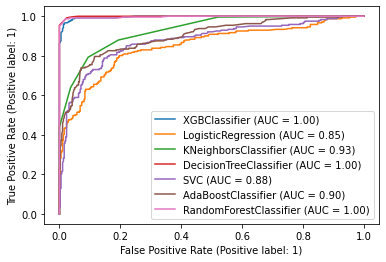

In [314]:
#For Training Data
disp = plot_roc_curve (xgb, x_train, y_train,)
plot_roc_curve (logreg, x_train, y_train, ax = disp.ax_)
plot_roc_curve (knn, x_train, y_train, ax = disp.ax_)
plot_roc_curve (dtc, x_train, y_train, ax = disp.ax_)
plot_roc_curve (svc, x_train, y_train, ax = disp.ax_)
plot_roc_curve (ada, x_train, y_train, ax = disp.ax_)
plot_roc_curve (RFC, x_train, y_train, ax = disp.ax_)

plt.legend (prop = {'size' : 10}, loc = 'lower right')
plt.show()

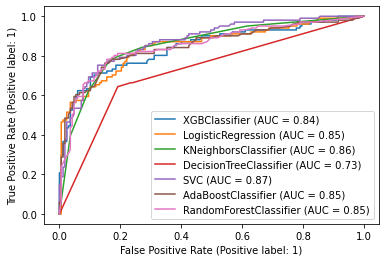

In [313]:
#For Testing Data
disp = plot_roc_curve (xgb, x_test, y_test)
plot_roc_curve (logreg, x_test, y_test, ax = disp.ax_)
plot_roc_curve (knn, x_test, y_test, ax = disp.ax_)
plot_roc_curve (dtc, x_test, y_test, ax = disp.ax_)
plot_roc_curve (svc, x_test, y_test, ax = disp.ax_)
plot_roc_curve (ada, x_test, y_test, ax = disp.ax_)
plot_roc_curve (RFC, x_test, y_test, ax = disp.ax_)

plt.legend (prop = {'size' : 10}, loc = 'lower right')
plt.show()

# <span style="color:green">Conclusion-SupportVectorClassifier perform well on test data in AUC ROC curve

# <span style="color:black">****HyperParameter Tuning for svc model****

In [315]:
from sklearn.model_selection import GridSearchCV
svc.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [317]:
# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

In [318]:
gs2 = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
gs2.fit(x_train, y_train)

print('Best score:', gs2.best_score_)
print('Best score:', gs2.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.768 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.856 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.758 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.782 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.792 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.816 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.848 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.734 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.766 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.680 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [330]:
svc_new = SVC(C= 10, gamma= 0.1, kernel= 'rbf')
svc_new.fit(x_train, y_train)
y_pred = svc_new.predict (x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8208955223880597

# <span style="color:green">Conclusion-After Performing HyperParameter Tuning, score for SupportVectorClassifier model is same as before.

# Saving Model

In [326]:
import joblib
joblib.dump(svc_new,'Model to Predict Survived Passenger')

['Model to Predict Survived Passenger']

# Model Prediction

In [327]:
svm_model = joblib.load('Model to Predict Survived Passenger')
Passenger = svm_model.predict(x_test)
Passenger

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [329]:
test_data = np.array(y_test)
Titanic = pd.DataFrame({'predicted': Passenger,'original':test_data})
Titanic

,predicted,original
0,0,1
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
263,0,0
264,0,1
265,0,0
266,0,0


# <span style="color:BLUE"> ------------------END-----------------------